In [51]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import mnist

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

In [53]:
cnn_model = Sequential()
cnn_model.add(Conv2D(16, kernel_size=(5, 5), padding="same", input_shape=(28,28,1), activation="relu"))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Conv2D(16, kernel_size=(5, 5), padding="same", activation="relu"))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
"""cnn_model.add(Conv2D(16, kernel_size=(5, 5), padding="same", activation="relu"))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Conv2D(16, kernel_size=(5, 5), padding="same", activation="relu"))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Conv2D(16, kernel_size=(5, 5), padding="same", activation="relu"))
cnn_model.add(MaxPooling2D(pool_size=(1, 1)))"""
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation="relu"))
cnn_model.add(Dense(10, activation="softmax"))
cnn_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 16)          │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 16)          │           6,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 108,602 (424.23 KB)

 Trainable params: 108,602 (424.23 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
(x_train_img, y_train_label), (x_test_img, y_test_label) = mnist.load_data()

In [55]:
y_train_label[0]

np.uint8(5)

In [56]:
y_train = to_categorical(y_train_label)
y_test = to_categorical(y_test_label)

In [57]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [58]:
print("X_train:", x_train_img.shape)
X_train = x_train_img.reshape(-1, 28, 28, 1).astype('float32')
print("X_train after reshape:", X_train.shape)
print("--------------------------------------------------------")
print("X_test:", x_test_img.shape)
X_test = x_test_img.reshape(-1, 28, 28, 1).astype('float32')
print("X_test after reshape:", X_test.shape)

X_train: (60000, 28, 28)
X_train after reshape: (60000, 28, 28, 1)
--------------------------------------------------------
X_test: (10000, 28, 28)
X_test after reshape: (10000, 28, 28, 1)


In [59]:
#Define model correct method
cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#Train model
cnn_model.fit(X_train, y_train, validation_split=0.2, epochs=5, batch_size=128,)

Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7297 - loss: 4.9971 - val_accuracy: 0.9640 - val_loss: 0.1234
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9695 - loss: 0.0977 - val_accuracy: 0.9721 - val_loss: 0.0925
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9809 - loss: 0.0608 - val_accuracy: 0.9774 - val_loss: 0.0781
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9872 - loss: 0.0418 - val_accuracy: 0.9751 - val_loss: 0.0841
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9904 - loss: 0.0307 - val_accuracy: 0.9739 - val_loss: 0.0958


In [60]:
score = cnn_model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9710 - loss: 0.0996


In [76]:
from matplotlib import pyplot as plt
def plot_images_labels_prediction(images, labels, predict, index, num):
  fig = plt.gcf()
  fig.set_size_inches(12,14)
  if num>25: num=25
  for i in range(0,num):
    ax = plt.subplot(5,5,1+i)
    ax.imshow(images[index],cmap='binary')
    title = "label=" + str(labels[index])
    title += ",predict=" +str(predict[index])
    title += ", index=" +str(index)
    ax.set_title(title,fontsize=10)
    ax.set_xticks([]);ax.set_yticks([])
    index+=1
  plt.show()

In [62]:
predict_ans = cnn_model.predict(X_test)
predict_ans = np.argmax(predict_ans, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


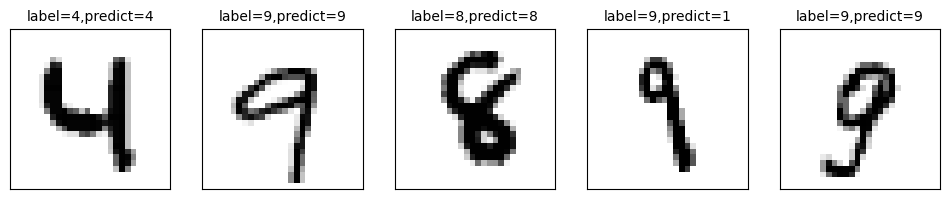

In [72]:
plot_images_labels_prediction(X_test, y_test_label, predict_ans, index=3500, num=5)

In [77]:
from ipywidgets import interact_manual
def show_figure(idx):
  plot_images_labels_prediction(x_test_img, y_test_label, predict_ans, index=idx, num=1)
interact_manual(show_figure, idx=(0,9999))

interactive(children=(IntSlider(value=4999, description='idx', max=9999), Button(description='Run Interact', s…

<function __main__.show_figure(idx)>

Total number of errors: 247
Error indexes: [48, 95, 115, 247, 259, 318, 320, 321, 340, 420, 447, 495, 543, 551, 582, 583, 591, 646, 689, 726, 740, 881, 924, 926, 947, 959, 969, 1002, 1014, 1026, 1039, 1112, 1121, 1182, 1242, 1247, 1248, 1260, 1279, 1319, 1364, 1378, 1440, 1447, 1453, 1466, 1522, 1530, 1553, 1566, 1686, 1721, 1790, 1808, 1816, 1823, 1871, 1877, 1878, 1899, 1901, 1924, 2070, 2098, 2107, 2118, 2130, 2135, 2148, 2182, 2225, 2272, 2280, 2293, 2371, 2380, 2387, 2408, 2414, 2447, 2462, 2480, 2597, 2654, 2758, 2771, 2780, 2836, 2896, 2938, 2946, 2959, 2970, 2990, 3060, 3100, 3117, 3172, 3250, 3288, 3289, 3319, 3330, 3336, 3375, 3384, 3422, 3451, 3457, 3490, 3503, 3520, 3533, 3558, 3559, 3597, 3615, 3626, 3629, 3662, 3727, 3756, 3780, 3808, 3818, 3906, 3941, 4001, 4044, 4075, 4078, 4100, 4102, 4156, 4176, 4199, 4224, 4238, 4265, 4269, 4271, 4289, 4300, 4377, 4380, 4455, 4486, 4497, 4513, 4536, 4548, 4578, 4639, 4671, 4724, 4731, 4740, 4743, 4783, 4807, 4808, 4823, 4860, 4879, 4

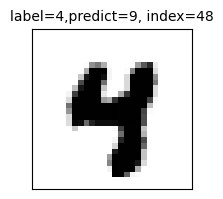

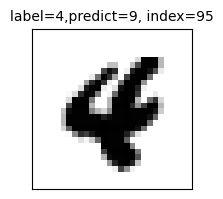

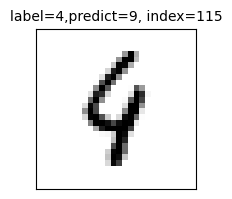

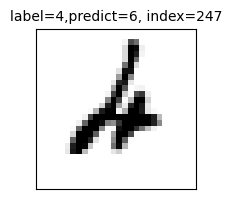

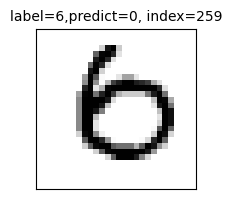

In [79]:
#HW
#思考一下如何結合上面定義的plot_images_labels_prediction函式結合迴圈將test資料集內所有預測錯誤的結果
#印出前五張錯誤內容以及統計錯誤數量有多少?
#印出所有錯誤的位置

error_count = 0
error_indexes = []

for i in range(len(X_test)):
  if predict_ans[i] != y_test_label[i]:
    error_count += 1
    error_indexes.append(i)

print("Total number of errors:", error_count)

if error_count > 0:
  print("Error indexes:", error_indexes)
  for i in range(5):
      plot_images_labels_prediction(X_test, y_test_label, predict_ans, index=error_indexes[i], num=1)